# 백준 20057(https://www.acmicpc.net/problem/20057)

마법사 상어가 토네이도를 배웠고, 오늘은 토네이도를 크기가 N×N인 격자로 나누어진 모래밭에서 연습하려고 한다. 위치 (r, c)는 격자의 r행 c열을 의미하고, A[r][c]는 (r, c)에 있는 모래의 양을 의미한다.

토네이도를 시전하면 격자의 가운데 칸부터 토네이도의 이동이 시작된다. 토네이도는 한 번에 한 칸 이동한다. 다음은 N = 7인 경우 토네이도의 이동이다.
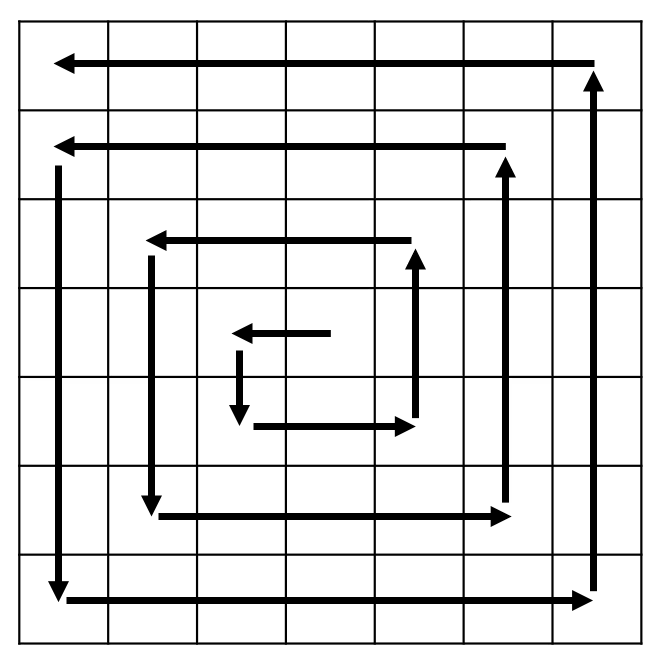
토네이도가 한 칸 이동할 때마다 모래는 다음과 같이 일정한 비율로 흩날리게 된다.
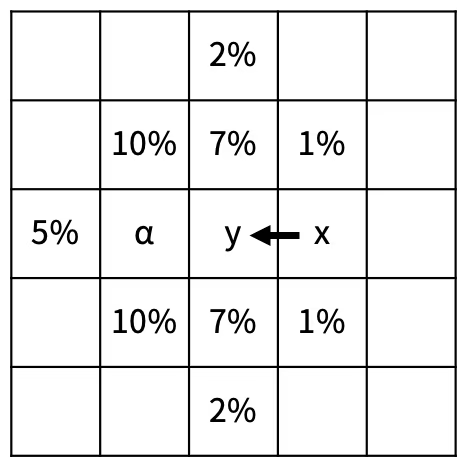
토네이도가 x에서 y로 이동하면, y의 모든 모래가 비율과 α가 적혀있는 칸으로 이동한다. 비율이 적혀있는 칸으로 이동하는 모래의 양은 y에 있는 모래의 해당 비율만큼이고, 계산에서 소수점 아래는 버린다. α로 이동하는 모래의 양은 비율이 적혀있는 칸으로 이동하지 않은 남은 모래의 양과 같다. 모래가 이미 있는 칸으로 모래가 이동하면, 모래의 양은 더해진다. 위의 그림은 토네이도가 왼쪽으로 이동할 때이고, 다른 방향으로 이동하는 경우는 위의 그림을 해당 방향으로 회전하면 된다.

토네이도는 (1, 1)까지 이동한 뒤 소멸한다. 모래가 격자의 밖으로 이동할 수도 있다. 토네이도가 소멸되었을 때, 격자의 밖으로 나간 모래의 양을 구해보자.

> 입력: 첫째 줄에 격자의 크기 N이 주어진다. 둘째 줄부터 N개의 줄에는 격자의 각 칸에 있는 모래가 주어진다. r번째 줄에서 c번째 주어지는 정수는 A[r][c] 이다.

> 출력: 격자의 밖으로 나간 모래의 양을 출력한다.

## 1. Python solution1

In [ ]:
import sys
input = sys.stdin.readline

In [5]:
N = int(input())

arr = []
for _ in range(N):
    arr.append(list(map(int, input().split(' '))))

# 왼, 아, 우, 위
dx = [0, 1, 0, -1]
dy = [-1, 0, 1, 0]

# 방향별 모래 비율
left = [
    (-2, 0, 0.02), (-1, -1, 0.10), (-1, 0, 0.07),
    (-1, 1, 0.01), (0, -2, 0.05), (1, -1, 0.10),
    (1, 0, 0.07), (1, 1, 0.01), (2, 0, 0.02)
]
down = [(-y, x, val) for x, y, val in left]
right = [(x, -y, val) for x, y, val in left]
up = [(y, x, val) for x, y, val in left]
ratio = [left, down, right, up]

x = N // 2
y = N // 2
direction = 0 # 방향(기본값: 서)
turn = 0 # 회전한 횟수
moved = 0 # 이동한 수
target = 1 # 이동할 칸의 수
result = 0 # 총 이동 횟수
cnt = 1

def move():
    global x, y, direction, turn, moved, target
    if moved == target:
        moved = 0
        turn += 1
        direction = (direction + 1) % 4
    if turn == 2:
        turn = 0
        target += 1
    x += dx[direction]
    y += dy[direction]
    moved += 1
    
while cnt < N * N:
    move()
    remain = arr[x][y] # 남은 모래의 양
    for i in range(9): # 각 9개의 위치로 모래 옮기기
        nx, ny, percentage = ratio[direction][i]
        nx += x
        ny += y
        current = int(arr[x][y] * percentage) # 옮길 모래 양
        # 맵을 벗어나는 경우
        if nx < 0 or nx >= N or ny < 0 or ny >= N:
            result += current
        else:
            arr[nx][ny] += current
            remain -= current
    # 알파(alpha) 값 처리하기(남은 모래 옮기기)
    nx = x + dx[direction]
    ny = y + dy[direction]
    # 맵을 벗어나는 경우
    if nx < 0 or nx >= N or ny < 0 or ny >= N:
        result += remain
    else:
        arr[nx][ny] += remain
    arr[x][y] = 0
    cnt += 1
    
print(result)

5
0 0 0 0 0
0 0 0 0 0
0 10 0 0 0
0 0 0 0 0
0 0 0 0 0
10
